## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [62]:
df = pd.read_csv("ab_data.csv")
df.head(30)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [63]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [64]:
df['user_id'].nunique()
# and can use it "len(df.user_id.unique())" as well

290584

d. The proportion of users converted.

In [65]:
df.query('converted == "1"').shape[0] /df['converted'].shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [66]:
no_new_treat= df.query('(group == "control" and landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")')
#len(no_new_treat)
no_new_treat.shape[0]

3893

f. Do any of the rows have missing values?

In [67]:
no_new_treat.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [68]:
df2 = df.drop(no_new_treat.index)
len(df2.query('(group == "control" and landing_page == "new_page") or (group == "treatment" and landing_page == "old_page")')
)

df2.shape

(290585, 5)

In [69]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [70]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [71]:
df2[df2.duplicated(['user_id'])]['user_id'].unique()

array([773192], dtype=int64)

c. What is the row information for the repeat **user_id**? 

In [72]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [73]:
df2 = df2.drop_duplicates(['user_id'], keep = 'first')
df2.shape
df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [75]:
df2.query('converted == "1"').shape[0]/ df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [76]:
p_control = df2.query('converted == "1" and group == "control"').shape[0] / df2.query('group == "control"').shape[0]
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [77]:
p_treatment = df2.query('converted == "1" and group == "treatment"').shape[0] / df2.query('group == "treatment"').shape[0]
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [78]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**NOTE** Users who recieve new page and old page are divided equally.
* All conversion are around 12% either control or treatment group
* Number of they converted to a new page in control group is 12%
* Number of they converted to a new page in treatment group is 11.9%
* As we see from last points, we found no evidence to say that the new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
- Null: P𝑛𝑒𝑤 - P𝑜𝑙𝑑 <= 0
- Alternative: P𝑛𝑒𝑤 - P𝑜𝑙𝑑 > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [79]:
Pnew = df2['converted'].mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [80]:
Pold = df2['converted'].mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [81]:
Nnew = df2.query('group == "treatment"').shape[0]
Nnew

145310

d. What is $n_{old}$?

In [82]:
Nold = df2.query('group == "control"').shape[0]
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [83]:
new_page_converted = np.random.binomial(Nnew, Pnew)
new_page_converted

17338

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [84]:
old_page_converted = np.random.binomial(Nold,Pold)
old_page_converted

17547

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [85]:
new_page_converted/Nnew - old_page_converted/Nold


-0.00146822847568856

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [86]:
p_diffs =[]

for _ in range(10000):
    old_page_converted = np.random.binomial(Nold,Pold)
    new_page_converted = np.random.binomial(Nnew, Pnew)
    diffs = new_page_converted/Nnew - old_page_converted/Nold
    p_diffs.append(diffs)    

p_diffs

[3.922506964684769e-05,
 -0.0003119397122003098,
 -0.0009380301512727368,
 7.358821874214883e-05,
 -0.00011229987670341446,
 0.0013744024190920218,
 0.0013605773480488553,
 0.0008031808051009032,
 -0.00039446038473983647,
 -0.003491792647123626,
 0.0003829998118396738,
 -0.001605708358020208,
 -0.0011862453263300071,
 0.0001560321495460565,
 -0.002562488599648055,
 0.000259252910468466,
 -0.0004357718821666884,
 0.00041084266095101074,
 -0.000835167518449878,
 5.977679067420416e-05,
 -0.00036678977819067093,
 0.00034204303176858797,
 -0.0004771652374448432,
 -0.0015505871378973246,
 0.00024585759314475764,
 0.00024574503859918495,
 0.0021108410314681636,
 -0.0001672266844293946,
 0.00010120084264661489,
 -0.0009727019726824132,
 0.0022345299501946997,
 0.0021800158424691574,
 -0.0009449392760505076,
 -0.00021540978845213665,
 -0.0012823608447058293,
 0.0010232342265010519,
 0.0013952338211114246,
 -0.0008350344994414588,
 0.0006516984930482195,
 0.000865146345869261,
 0.002179864064369

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'frequancy')

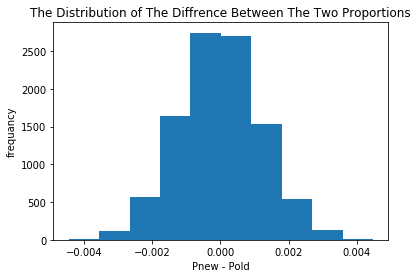

In [87]:
plt.hist(p_diffs)

plt.title('The Distribution of The Diffrence Between The Two Proportions')
plt.xlabel('Pnew - Pold')
plt.ylabel('frequancy')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [88]:
#calculate the actual diffrence in the data set
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
p_diffs = np.array(p_diffs)
(p_diffs > act_diff ).mean()

0.9064

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
* we calculated P-value 
* This value help us to find the optimal decision, FYI this value is in range 0 to 1  and this value is tell us that your assumption exists in null by calculated value so, when this value is less than .5 that means our assumption is not existing in in null as will reject it and vice versa. 
* in our solution p-value is high so it's likely to exist in null by 0.9 as the old page is better than new page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [89]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [90]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [Nold, Nnew],alternative = 'smaller')
print(f'z_score is: {z_score}\np_value is: {p_value}')

z_score is: 1.3109241984234394
p_value is: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [91]:
from scipy.stats import norm
# significant z-score is
print(norm.cdf(z_score))

#assumed at 95% confidence level: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


**Put your answer here.**
* Due to the z-score of 1.31 less than the critical value of 1.644, we fail to reject the null hypothesis that suggests the new page conversion rate is higher than the old rate
* yes, I agree with my findings

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regrission**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [122]:
import statsmodels.api as sm
#define the intercept column in the data frame
df2['intercept'] = 1
# create a dummy variable
df2['ab_page'] = pd.get_dummies(df['landing_page'])['new_page']
df2

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [128]:
#create the logistic regression model
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [129]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        19:04:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [130]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

if an user uses old page it's likely change to new by 0.98

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


the interpreting of this model is if the indivisual uses the new page, it is .98 times more likely to make a conversion than if he uses the old page. which means that there is a very tiny diffrence in the performance between the both pages, with more a little bit in the old page.

* The model is two sided test and in Part II -A/B test- was one sided test. In the model we Test not equal old page is not equal new page, but In hypothesis test we test old page is greater than or equal to new page.
*** 

* The P-value associated with page equals to .19, it is diffrent from the p-value in the part II, Due to the hypothesises for null and alternative here are diffrent.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

Things like which program people applying for or age or gender of user might influence whether or not an individual converts or not to new page.
here appears in several different groups of data but disappears or reverses when these groups.

Yes, if we add correlations predictor variables, leading to unreliable and unstable estimates of regression coefficients "Multicollinearity" can affect our model.
Each time we include a new predictor variable with no change in sample size we lose a degree of freedom. 
The result sometimes is that previously significant predictor in the new regression is no long significant at the same probability of a Type 1 error (the significance level).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [132]:
#read csv file
df3 = pd.read_csv("countries.csv")

#join the country data frame with the converted rate data frame
df_joined = df2.join(df3.set_index('user_id'),on ='user_id')

#create dummy variables for the country column
df_joined[['CA','UK','US']] = pd.get_dummies(df_joined['country'])


In [133]:
#create a logistic reggresion model for the converted
#column with the country dummy variables columns
df_joined['intercept'] = 1
logit_mod = sm.Logit(df_joined['converted'],df_joined[['intercept','UK','CA']])
results_2 = logit_mod.fit()
results_2.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:               1.521e-05
Time:                        19:08:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

In [135]:
np.exp(results_2.params)

intercept    0.135779
UK           1.009966
CA           0.960018
dtype: float64

Interpretation of the previous logistic model:

1.If an user is from US, it is 1 time more likely to make a conversion than if he is from UK , holding all other variables constant.

2.If an indivisual is from US , it is 0.96 more likely to make a conversion than if he is from CA, holding all other variables constant.

from these values which is very close to 1 time, we can notice that there is no influence on the conversion rate comes from the country variable.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [141]:
#create a logistic reggresion model for the converte

logit_mod = sm.Logit(df_joined['converted'],df_joined[['intercept','ab_page','UK','CA']])
results_3 = logit_mod.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        19:23:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

In [137]:
np.exp(results_3.params)

intercept    0.136795
ab_page      0.985168
UK           1.009932
CA           0.960062
dtype: float64

We can interpret the result like this:

1. if an user uses the new page, it is .985 more likely to make a conversion than if he uses the old page, holding all other variables constant.

2. If an user is from UK , it is 1,009 more likely to make a conversion than if he is from US, holding all other variables constant.

3. If an user is from CA , it is 0.96 more likely to make a conversion than if he is from US, holding all other variables constant.

In [138]:
#create the interaction model between the pages and countries using dmatrices 

from patsy import dmatrices

# create dummy variables, and their interactions
y, X = dmatrices('converted ~ C(country)*C(landing_page)', df_joined, return_type="dataframe")

y = np.ravel(y)

#create a logistic model with X as independent variables, and y as dependent one.

logit_mod = sm.Logit(y,X)
results_4 = logit_mod.fit()
results_4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 22 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        19:12:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -2.0715      0.037    -55.798      0.000      -2.144      -1.999
C(country)[T.UK]                                 0.0901      0.040      2.225      0.026       0.011       0.169
C(country)[T.US]                                 0.0644      0.038      1.679      0.093      -0.011       0.140
C(landing_page)[T.old_page]                      0.0674      0.052      1.297      0.195      -0.034       0.169
C(country)[T.UK]:C(landing_page)[T.old_page]    -0.0783      0.057     -1.378      0.168      -0.190       0.033
C(country)[T.US]:C(landing_page)[T.old_page]    -0.0469      0.054     -0.872      0.383      -0.152       0.059
================================================================================================================
"""

In [140]:
np.exp(results_4.params)

Intercept                                       0.126002
C(country)[T.UK]                                1.094247
C(country)[T.US]                                1.066532
C(landing_page)[T.old_page]                     1.069775
C(country)[T.UK]:C(landing_page)[T.old_page]    0.924703
C(country)[T.US]:C(landing_page)[T.old_page]    0.954198
dtype: float64

* if an individual is from CA and use a new page, he is 1.094247 times more likely to make a conversion than if he is from UK and using the new page , holding all other variables constant.

* if an individual is from CA and use a new page, he is 1.066532 times more likely to make a conversion than if he is from US and use a new page , holding all other variables constant.

* If an individual is from CA and use a new page, he is 1.069775 times more likely to make a conversion than if he is from CA and use an old page, holding all other variables constant.

* there is no effect in the conversion rate if an indivisual uses old page or new page 
* there is no effect in the conversion rate if user is in a specific country or other country.

* there is no diffrence in the conversion rate if an indivisual uses one of the pages and he is in a specific country.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 
Finally, we can find the optimal decision using approaches so here in the project we are seeking to find which page is better than another which called stick to old page or accept the change to new page, by the converted rate,these approaches arethe probability, hypothesis testing, and the regression models, all of these ways give us evidences that the old page is better than the new one but with a tiny diffrence, so we can make a decision that keep the old page and reject the change to new one

We should stick to the old page is better than the new page. Also will not need to waste time and put alot of effort to create the new page instead of creating new page.

